# Vinushree Nagraj
# Module 1 assignemnet
# Classification using Nearest Neighbors

parts of code used from https://www.geeksforgeeks.org/ml-kaggle-breast-cancer-wisconsin-diagnosis-using-knn/

In [ ]:
# Import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part A : Breast Cancer Dataset

In [ ]:
#retrive diagnosing breast cancer data
from google.colab import files
uploaded = files.upload()

Saving wdbc.csv to wdbc (2).csv


In [ ]:
data = pd.read_csv("wdbc.csv")
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,866203,M,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,0.05044,0.6896,1.342,5.216,81.23,0.004428,0.02731,0.04040,0.013610,0.02030,0.002686,22.32,25.73,148.20,1538.0,0.1021,0.2264,0.32070,0.12180,0.2841,0.06541
1,91505,B,12.54,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,0.1943,0.06612,0.2577,1.095,1.566,18.49,0.009702,0.01567,0.02575,0.011610,0.02801,0.002480,13.57,21.40,86.67,552.0,0.1580,0.1751,0.18890,0.08411,0.3155,0.07538
2,9010018,M,15.08,25.74,98.00,716.6,0.10240,0.09769,0.12350,0.06553,0.1647,0.06464,0.6534,1.506,4.174,63.37,0.010520,0.02431,0.04912,0.017460,0.02120,0.004867,18.51,33.22,121.20,1050.0,0.1660,0.2356,0.40290,0.15260,0.2654,0.09438
3,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,0.06481,0.3550,1.534,2.302,23.13,0.007595,0.02219,0.02880,0.008614,0.02710,0.003451,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
4,91376701,B,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,0.2239,1.139,1.577,18.04,0.005096,0.01205,0.00941,0.004551,0.01608,0.002399,14.17,31.99,92.74,622.9,0.1256,0.1804,0.12300,0.06335,0.3100,0.08203


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#change the diagnosis value to integer
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0

data['Diagnosis'] = data['Diagnosis'].apply(diagnosis_value)

In [ ]:
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,866203,1,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,0.05044,0.6896,1.342,5.216,81.23,0.004428,0.02731,0.04040,0.013610,0.02030,0.002686,22.32,25.73,148.20,1538.0,0.1021,0.2264,0.32070,0.12180,0.2841,0.06541
1,91505,0,12.54,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,0.1943,0.06612,0.2577,1.095,1.566,18.49,0.009702,0.01567,0.02575,0.011610,0.02801,0.002480,13.57,21.40,86.67,552.0,0.1580,0.1751,0.18890,0.08411,0.3155,0.07538
2,9010018,1,15.08,25.74,98.00,716.6,0.10240,0.09769,0.12350,0.06553,0.1647,0.06464,0.6534,1.506,4.174,63.37,0.010520,0.02431,0.04912,0.017460,0.02120,0.004867,18.51,33.22,121.20,1050.0,0.1660,0.2356,0.40290,0.15260,0.2654,0.09438
3,862989,0,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,0.06481,0.3550,1.534,2.302,23.13,0.007595,0.02219,0.02880,0.008614,0.02710,0.003451,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
4,91376701,0,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,0.2239,1.139,1.577,18.04,0.005096,0.01205,0.00941,0.004551,0.01608,0.002399,14.17,31.99,92.74,622.9,0.1256,0.1804,0.12300,0.06335,0.3100,0.08203


In [ ]:
# Create feature and target data
X = np.array(data.iloc[:, 1:])
y = np.array(data['Diagnosis'])

# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=21)

In [ ]:
#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1
 1 1 1]


In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[71,  0],
       [ 2, 41]])

In [ ]:
knn.score(X_test, y_test)

0.9824561403508771

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is  9 


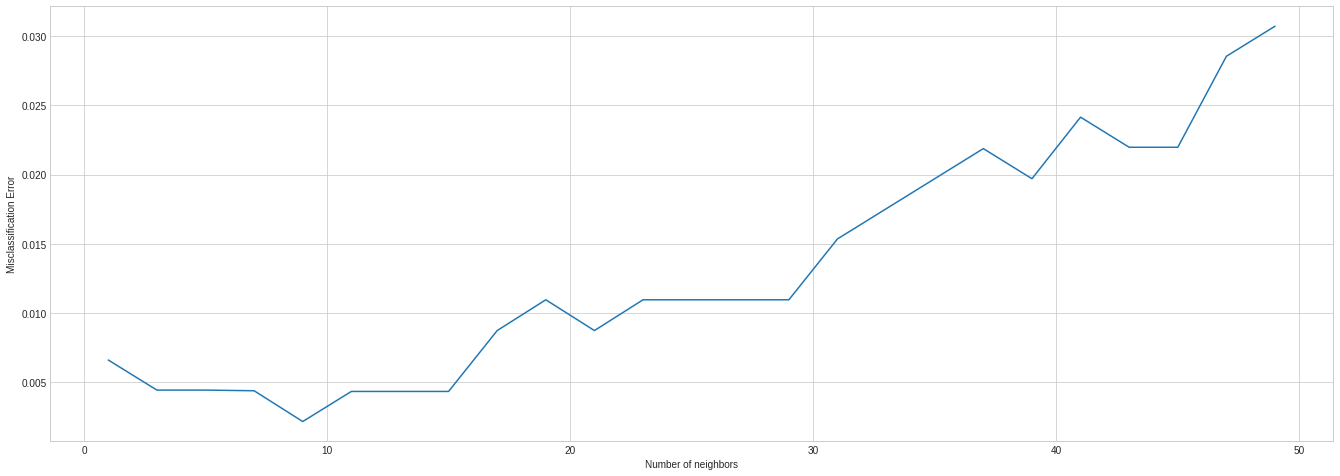

In [ ]:
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (23, 8))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[71,  0],
       [ 1, 42]])

In [ ]:
knn.score(X_test, y_test)

0.9912280701754386

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# KNN score for different values of K

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.9978 
k-Nearest Neighbor classifier on testing set: 0.9912 


In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[71,  0],
       [ 1, 42]])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.9978 
k-Nearest Neighbor classifier on testing set: 0.9912 


In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[71,  0],
       [ 1, 42]])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.9956 
k-Nearest Neighbor classifier on testing set: 0.9825 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.9912 
k-Nearest Neighbor classifier on testing set: 0.9825 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.9934 
k-Nearest Neighbor classifier on testing set: 0.9912 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 1.0000 
k-Nearest Neighbor classifier on testing set: 0.9912 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.9780 
k-Nearest Neighbor classifier on testing set: 0.9561 


#  Different random train-test splits of the data

In [ ]:
# 90% train data and 10% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.1, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[37,  0],
       [ 0, 20]])

In [ ]:
print(knn.score(X_test, y_test))
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")

1.0
k-Nearest Neighbor classifier on training set: 0.9961 
k-Nearest Neighbor classifier on testing set: 1.0000 


In [ ]:
# 70% train data and 30% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[107,   0],
       [  3,  61]])

In [ ]:
print(knn.score(X_test, y_test))
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")

0.9824561403508771
k-Nearest Neighbor classifier on training set: 0.9975 
k-Nearest Neighbor classifier on testing set: 0.9825 


In [ ]:
# 60% train data and 40% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.4, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[143,   0],
       [  2,  83]])

In [ ]:
print(knn.score(X_test, y_test))
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")

0.9912280701754386
k-Nearest Neighbor classifier on training set: 0.9941 
k-Nearest Neighbor classifier on testing set: 0.9912 


In [ ]:
# 50% train data and 50% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.5, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[181,   0],
       [  3, 101]])

In [ ]:
knn.score(X_test, y_test)

0.9894736842105263

In [ ]:
# 40% train data and 60% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.6, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[215,   0],
       [  9, 118]])

In [ ]:
knn.score(X_test, y_test)

0.9736842105263158

In [ ]:
# 30% train data and 70% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.7, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[248,   1],
       [ 10, 140]])

In [ ]:
knn.score(X_test, y_test)

0.9724310776942355

In [ ]:
# 20% train data and 80% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.8, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test, y_test)

0.9736842105263158

# Part B

In [ ]:
#retrive diagnosing breast cancer data
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.drop(['Geography','Surname', 'CustomerId','RowNumber'], axis = 1, inplace=True)

In [ ]:
df.Gender = [1 if each == 'Male' else 0 for each in df.Gender]

In [ ]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [ ]:
X = df.iloc[:, :9].values
y = df.iloc[:, 9].values

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1566,   38],
       [ 272,  124]])

In [ ]:
knn.score(X_test, y_test)

0.845

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1604
           1       0.77      0.31      0.44       396

    accuracy                           0.84      2000
   macro avg       0.81      0.64      0.68      2000
weighted avg       0.83      0.84      0.82      2000



In [ ]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is  15 


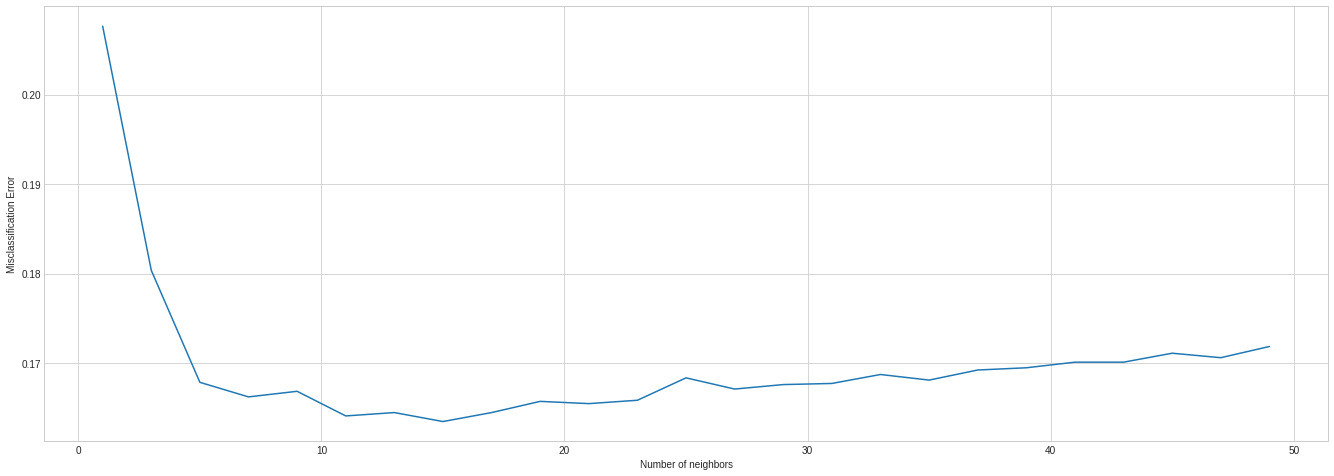

In [ ]:
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (23, 8))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")

k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.8478 
k-Nearest Neighbor classifier on testing set: 0.8500 


In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1573,   31],
       [ 269,  127]])

In [ ]:
knn.score(X_test, y_test)

0.85

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1604
           1       0.80      0.32      0.46       396

    accuracy                           0.85      2000
   macro avg       0.83      0.65      0.69      2000
weighted avg       0.84      0.85      0.82      2000



# KNN score for different values of K

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.8651 
k-Nearest Neighbor classifier on testing set: 0.8325 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.8510 
k-Nearest Neighbor classifier on testing set: 0.8410 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.8458 
k-Nearest Neighbor classifier on testing set: 0.8470 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.8410 
k-Nearest Neighbor classifier on testing set: 0.8460 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.8915 
k-Nearest Neighbor classifier on testing set: 0.8270 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 1.0000 
k-Nearest Neighbor classifier on testing set: 0.7875 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")


k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.8304 
k-Nearest Neighbor classifier on testing set: 0.8340 


#  Different random train-test splits of the data

In [ ]:
# 90% train data and 10% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.1, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[781,  18],
       [142,  59]])

In [ ]:
print(knn.score(X_test, y_test))
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")

0.84
k-Nearest Neighbor classifier on training set: 0.8522 
k-Nearest Neighbor classifier on testing set: 0.8400 


In [ ]:
# 70% train data and 30% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2332,   61],
       [ 429,  178]])

In [ ]:
print(knn.score(X_test, y_test))
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")

0.8366666666666667
k-Nearest Neighbor classifier on training set: 0.8516 
k-Nearest Neighbor classifier on testing set: 0.8367 


In [ ]:
# 60% train data and 40% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.4, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3110,   82],
       [ 579,  229]])

In [ ]:
print(knn.score(X_test, y_test))
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")

0.83475
k-Nearest Neighbor classifier on training set: 0.8502 
k-Nearest Neighbor classifier on testing set: 0.8347 


In [ ]:
# 50% train data and 50% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.5, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3904,   82],
       [ 716,  298]])

In [ ]:
knn.score(X_test, y_test)

0.8404

In [ ]:
# 40% train data and 60% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.6, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4666,  126],
       [ 852,  356]])

In [ ]:
knn.score(X_test, y_test)

0.837

In [ ]:
# 30% train data and 70% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.7, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[5449,  127],
       [1071,  353]])

In [ ]:
knn.score(X_test, y_test)

0.8288571428571428

In [ ]:
# 20% train data and 80% test data
# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.8, random_state=21)

#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test, y_test)

0.82175